# Modelando as queimadas no estado do Amazonas

O objetivo aqui é testar alguns modelos diferentes e suas possibilidades, sem tuning de hiper parâmetros e preocupação com a precisão ou utilidade dos algoritmos na dada situação.

## Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

## Auxiliar Functions

In [2]:
def clean_x_axis(X_test):
    date_list = []
    year_list = X_test['year'].values
    month_list = X_test['month'].values
        
    for i in range(len(X_test)):
        date_list.append(str(year_list[i])[2:] + '-' + str(month_list[i]))
        
    return date_list

## Load datasets

In [3]:
agregated_data = pd.read_csv("..\\..\\dados\\Feature Engineered\\agregated_data.csv")

## Prepare Data

In [4]:
amazonas = agregated_data.loc[agregated_data['state'] == 'amazonas']
amazonas = amazonas.sort_values('month', kind="mergesort").sort_values('year', kind="mergesort")

In [5]:
input_features = ['year', 'month']
target_feature = ['incidents']

X, y = amazonas[input_features], amazonas[target_feature]

## Linear Modelling

### Linear Regression

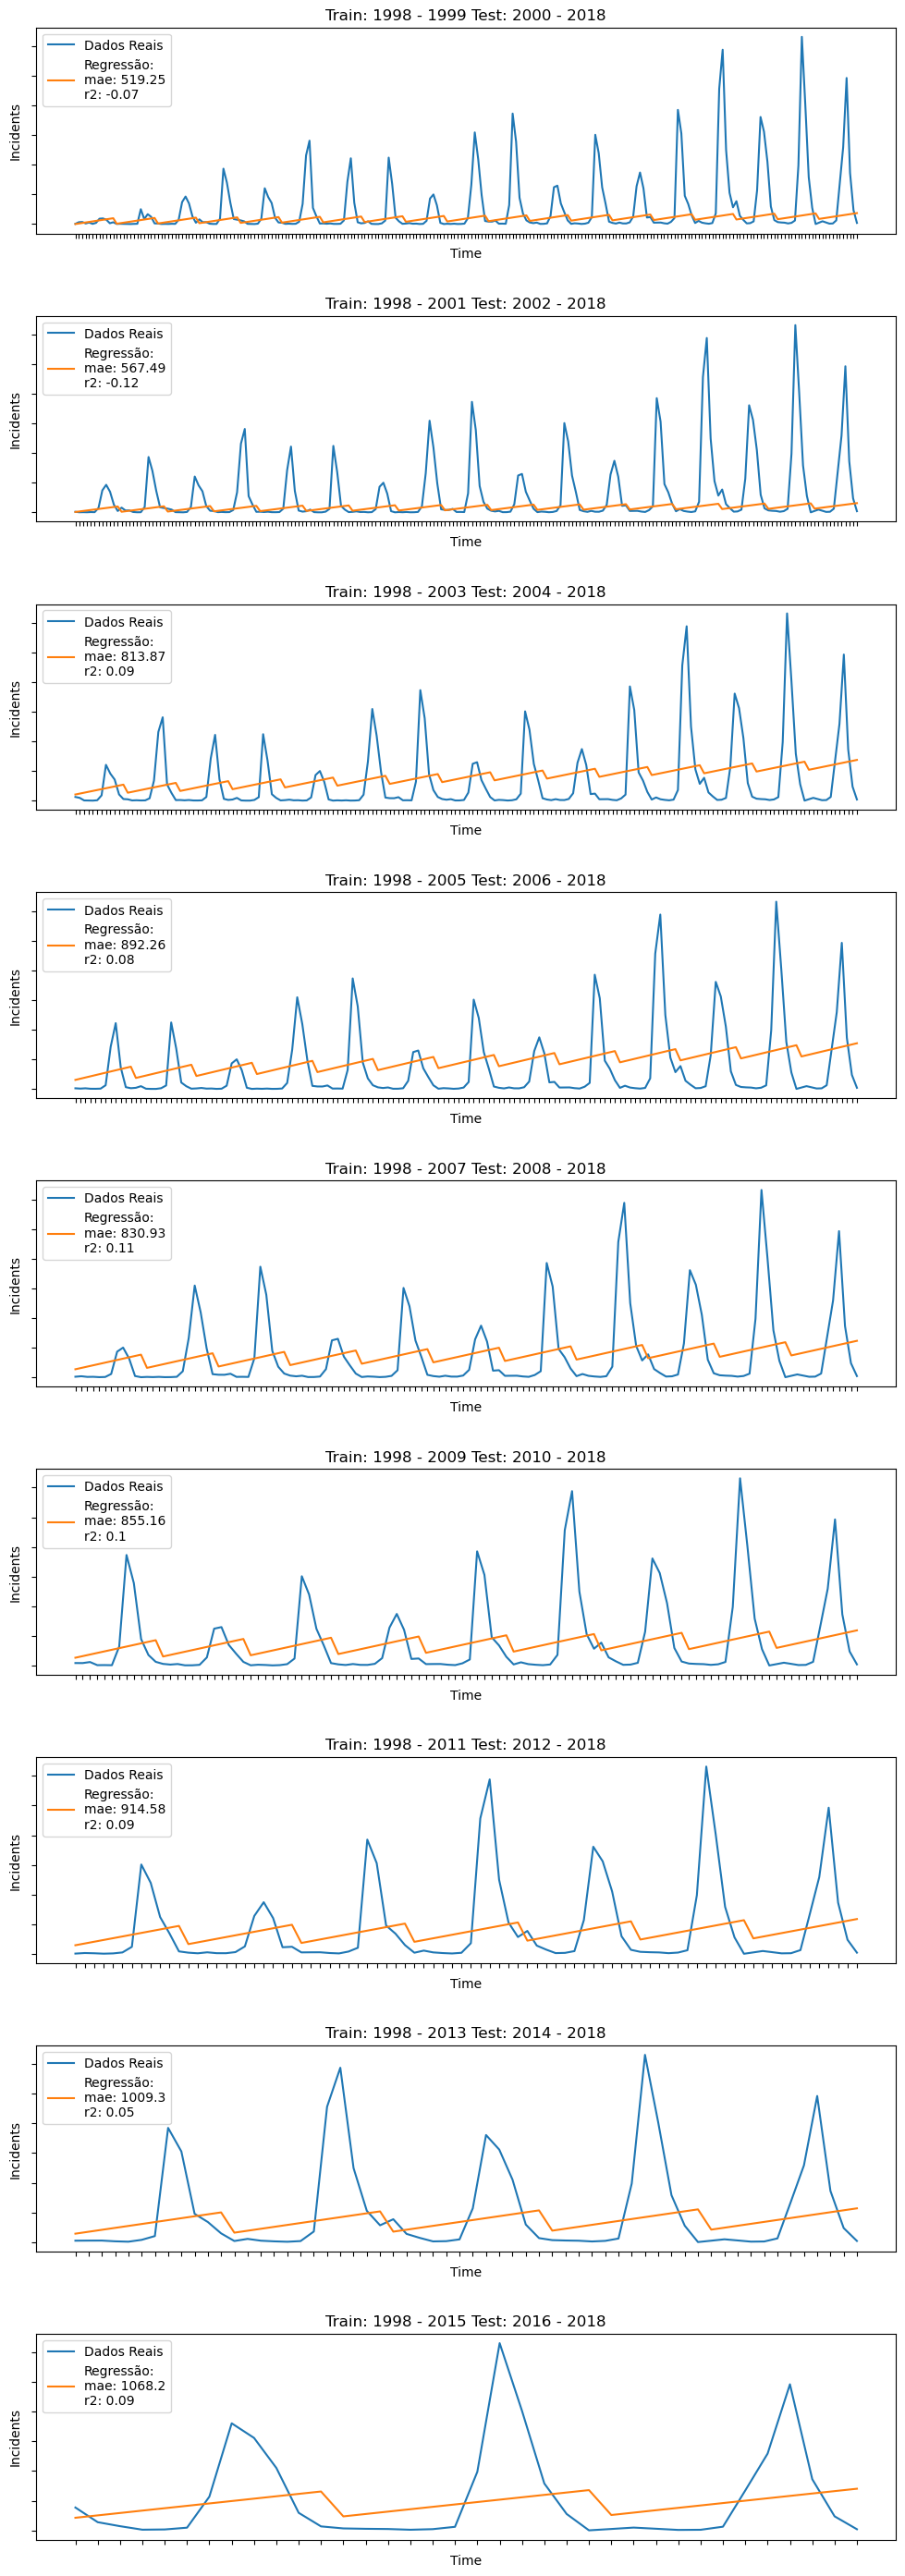

In [6]:
plt.rcParams['figure.figsize'] = [12, 4*9]
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['figure.subplot.hspace'] = 0.4 

fig, axs = plt.subplots(9)

i = 0
for cut_year in range(2000, 2017, 2):
    X_train, X_test = X.loc[X['year'] < cut_year], X[X['year'] >= cut_year]
    y_train, y_test = y.loc[X['year'] < cut_year], y[X['year'] >= cut_year]
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_predicted = lr.predict(X_test)
    
    axs[i].plot(np.array(clean_x_axis(X_test)), y_test, label=f"Dados Reais")
    axs[i].plot(np.array(clean_x_axis(X_test)), y_predicted, label=f"Regressão:\nmae: {np.round(mean_absolute_error(y_test, y_predicted), 2)}\nr2: {np.round(r2_score(y_test, y_predicted),2)}")
    
    axs[i].axes.xaxis.set_ticklabels([])
    axs[i].axes.yaxis.set_ticklabels([])
    axs[i].legend()
    axs[i].set_title(f"Train: 1998 - {cut_year - 1} Test: {cut_year} - 2018")
    axs[i].set_ylabel("Incidents")
    
    axs[i].set_xlabel("Time")
    i += 1

### Linear Regression with Polynomial Features

#### Adding poly features to 'month'

In [7]:
X2 = X.copy()
for i in range(2, 6, 1):
    X2['month' + f'^{i}'] = X2['month'].values ** i  

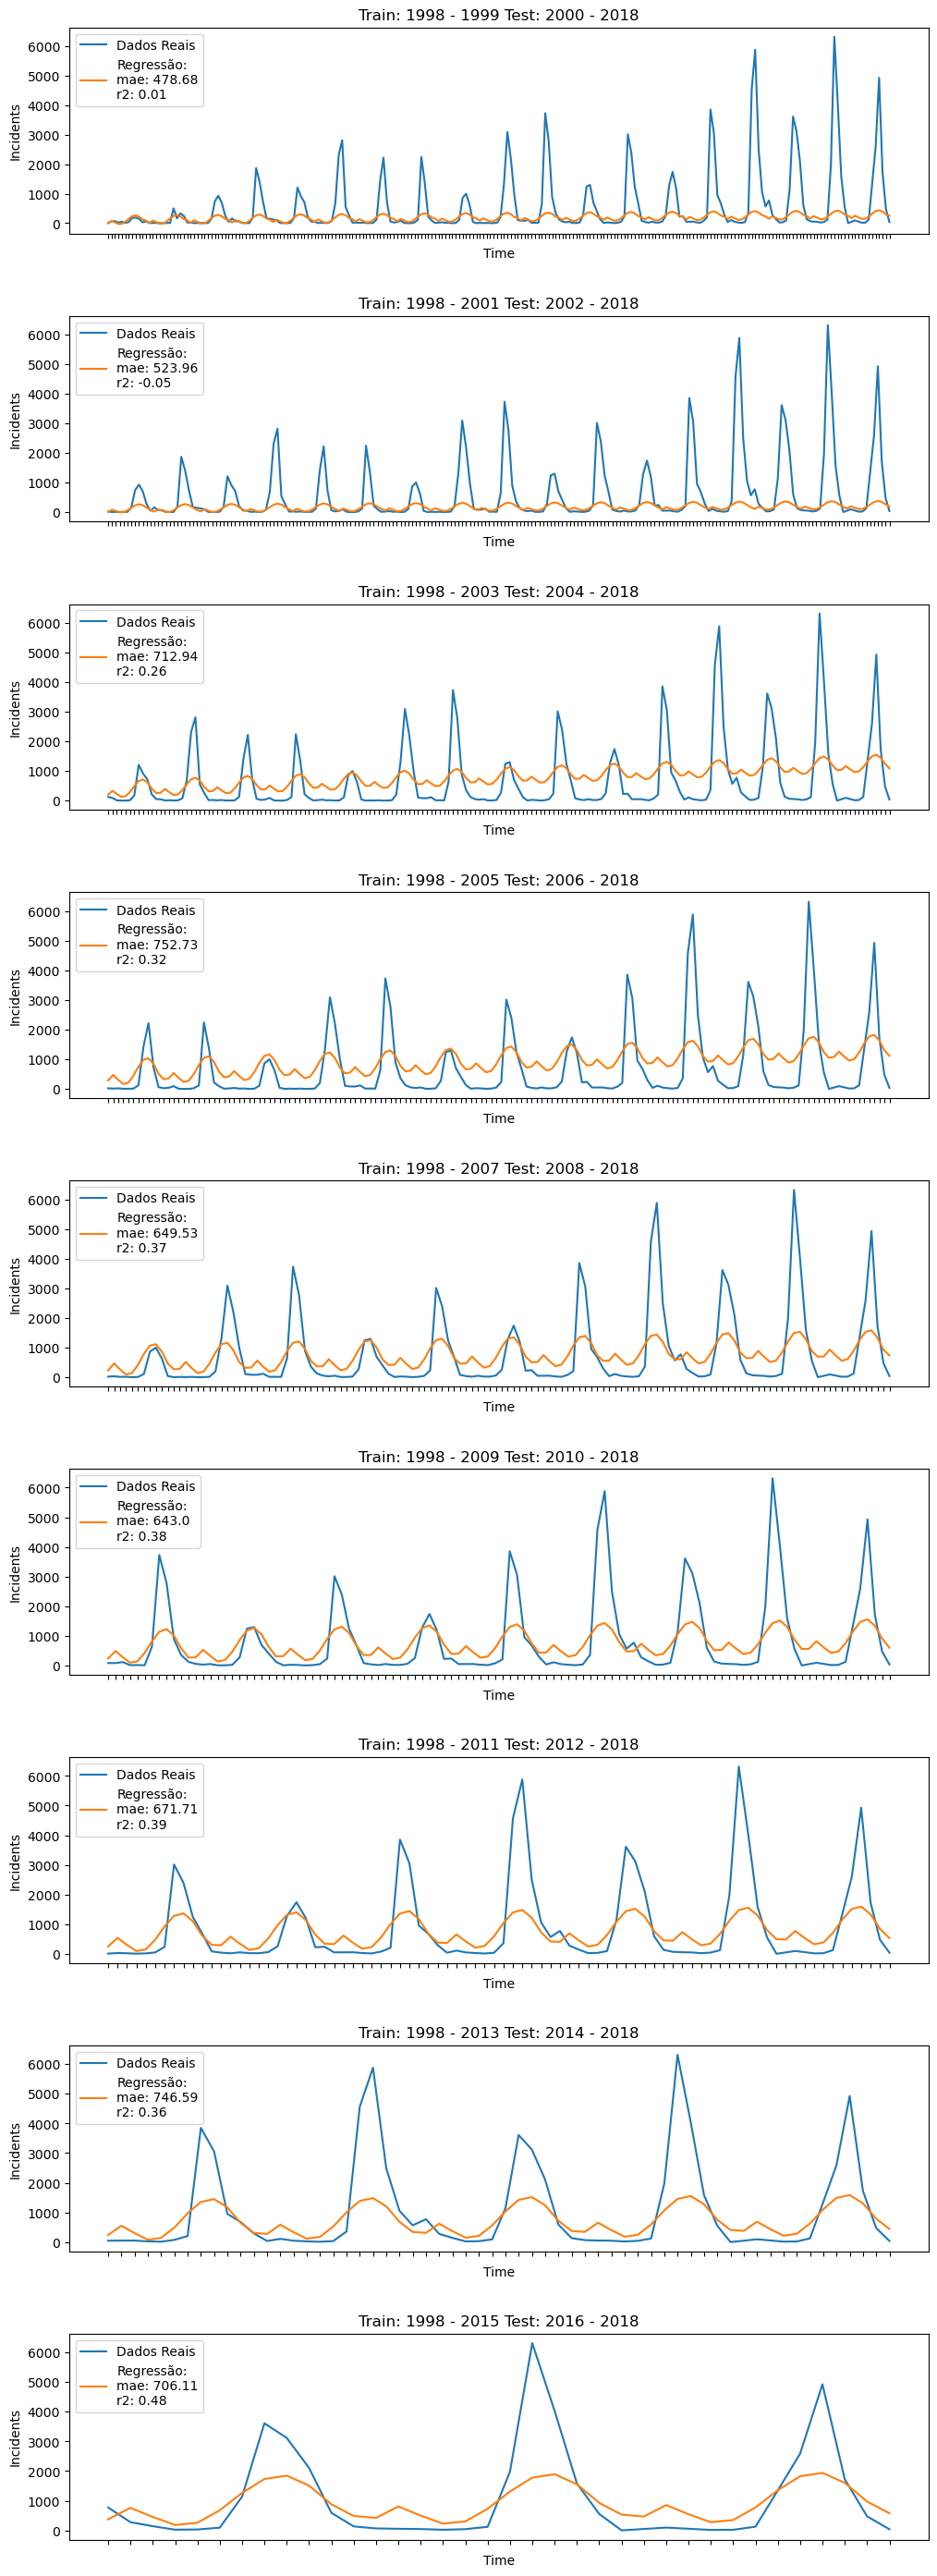

In [8]:
plt.rcParams['figure.figsize'] = [12, 4*9]
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['figure.subplot.hspace'] = 0.4 

fig, axs = plt.subplots(9)

i = 0
for cut_year in range(2000, 2017, 2):
    X_train, X_test = X2.loc[X2['year'] < cut_year], X2[X2['year'] >= cut_year]
    y_train, y_test = y.loc[X['year'] < cut_year], y[X['year'] >= cut_year]
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_predicted = lr.predict(X_test)
    
    axs[i].plot(np.array(clean_x_axis(X_test)), y_test, label=f"Dados Reais")
    axs[i].plot(np.array(clean_x_axis(X_test)), y_predicted, label=f"Regressão:\nmae: {np.round(mean_absolute_error(y_test, y_predicted), 2)}\nr2: {np.round(r2_score(y_test, y_predicted),2)}")
    
    axs[i].axes.xaxis.set_ticklabels([])
    axs[i].legend()
    axs[i].set_title(f"Train: 1998 - {cut_year - 1} Test: {cut_year} - 2018")
    axs[i].set_ylabel("Incidents")
    
    axs[i].set_xlabel("Time")
    i += 1

## Ensemble Trees Models

### Random Forest

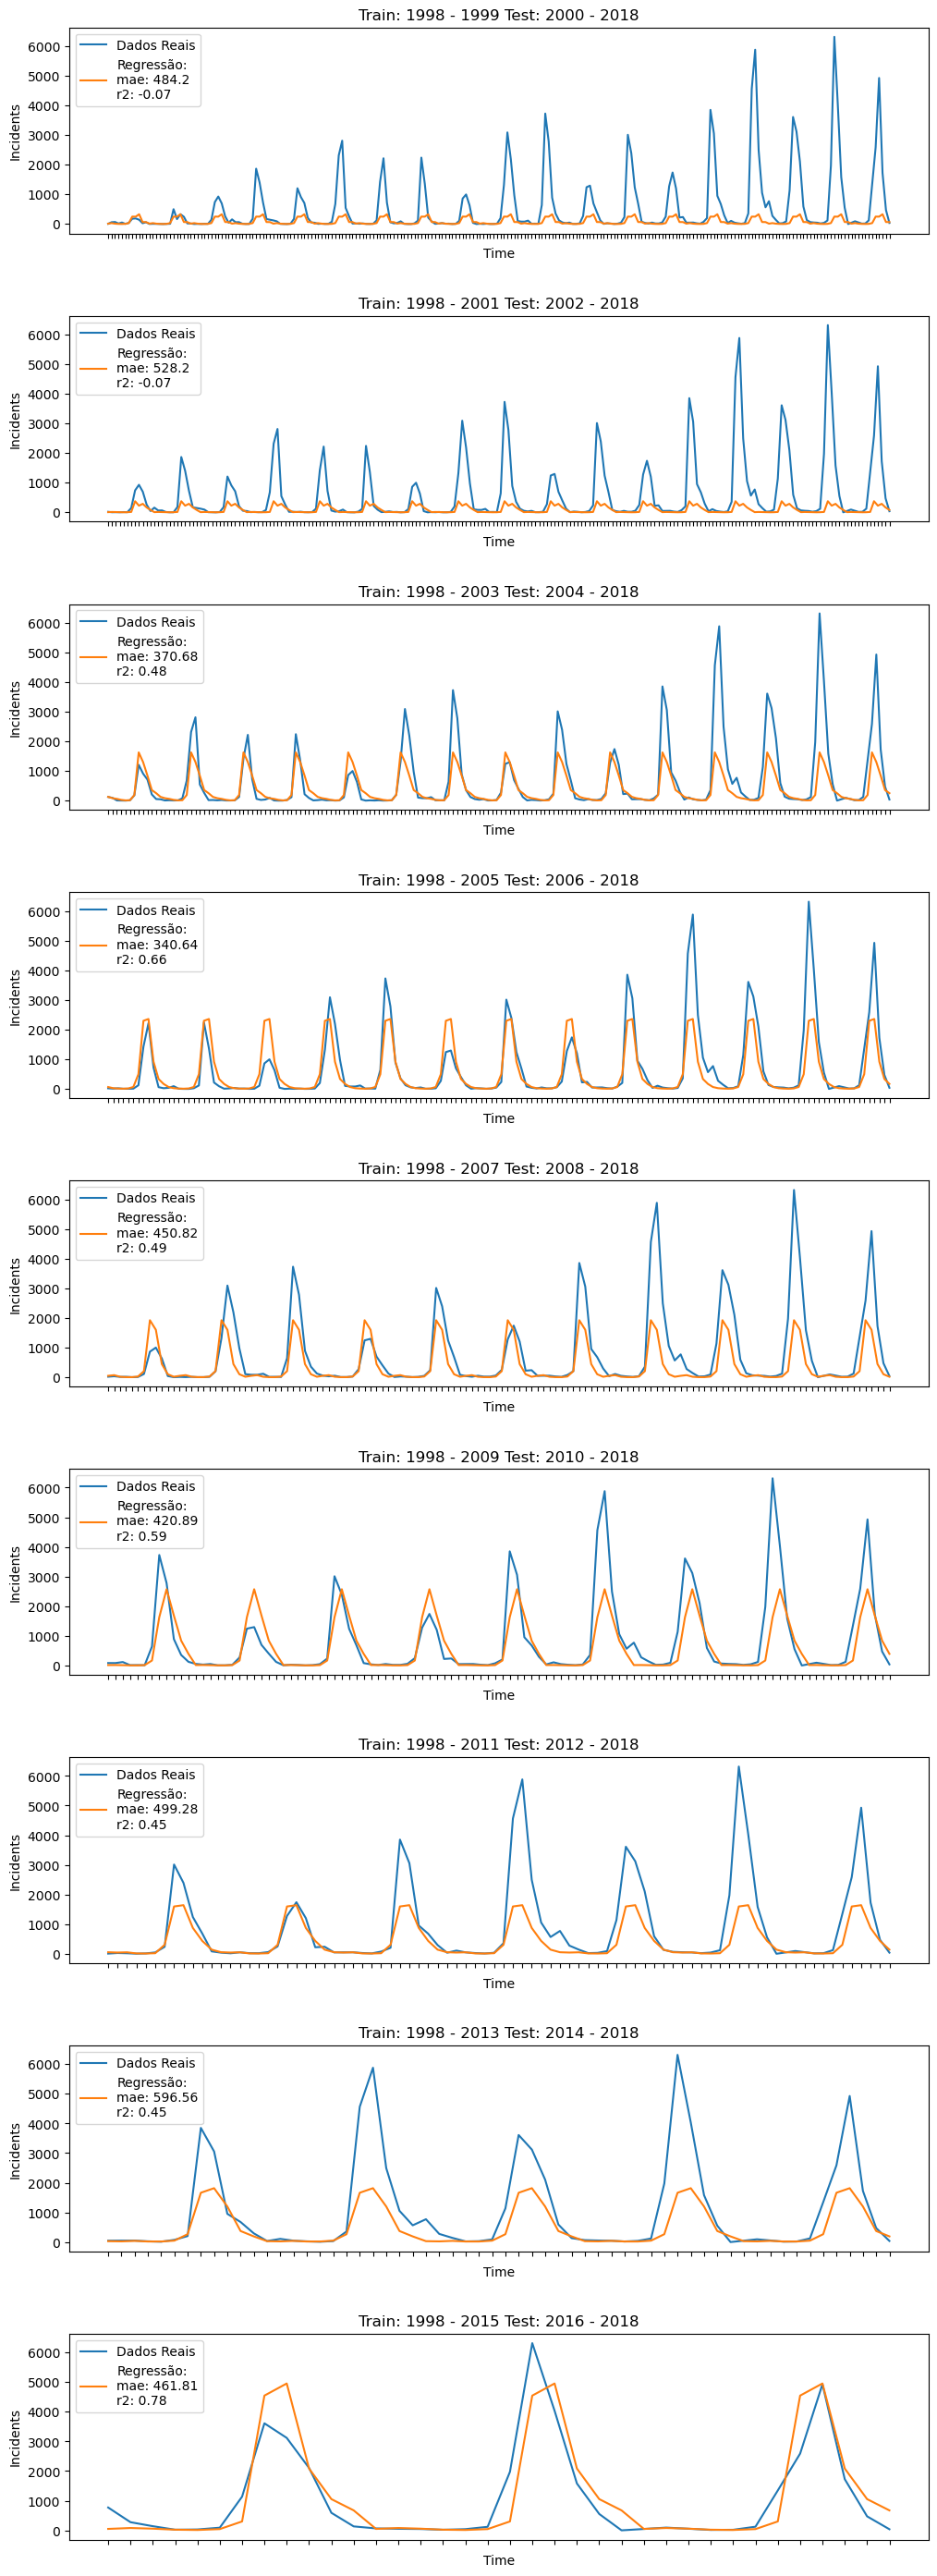

In [9]:
plt.rcParams['figure.figsize'] = [12, 4*9]
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['figure.subplot.hspace'] = 0.4 

fig, axs = plt.subplots(9)

i = 0
for cut_year in range(2000, 2017, 2):
    X_train, X_test = X.loc[X['year'] < cut_year], X[X['year'] >= cut_year]
    y_train, y_test = y.loc[X['year'] < cut_year], y[X['year'] >= cut_year]
    
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train.values.ravel())
    
    y_predicted = rf.predict(X_test)
    
    axs[i].plot(np.array(clean_x_axis(X_test)), y_test, label=f"Dados Reais")
    axs[i].plot(np.array(clean_x_axis(X_test)), y_predicted, label=f"Regressão:\nmae: {np.round(mean_absolute_error(y_test, y_predicted), 2)}\nr2: {np.round(r2_score(y_test, y_predicted),2)}")
    
    axs[i].axes.xaxis.set_ticklabels([])
    axs[i].legend()
    axs[i].set_title(f"Train: 1998 - {cut_year - 1} Test: {cut_year} - 2018")
    axs[i].set_ylabel("Incidents")
    
    axs[i].set_xlabel("Time")
    i += 1

### Extra trees

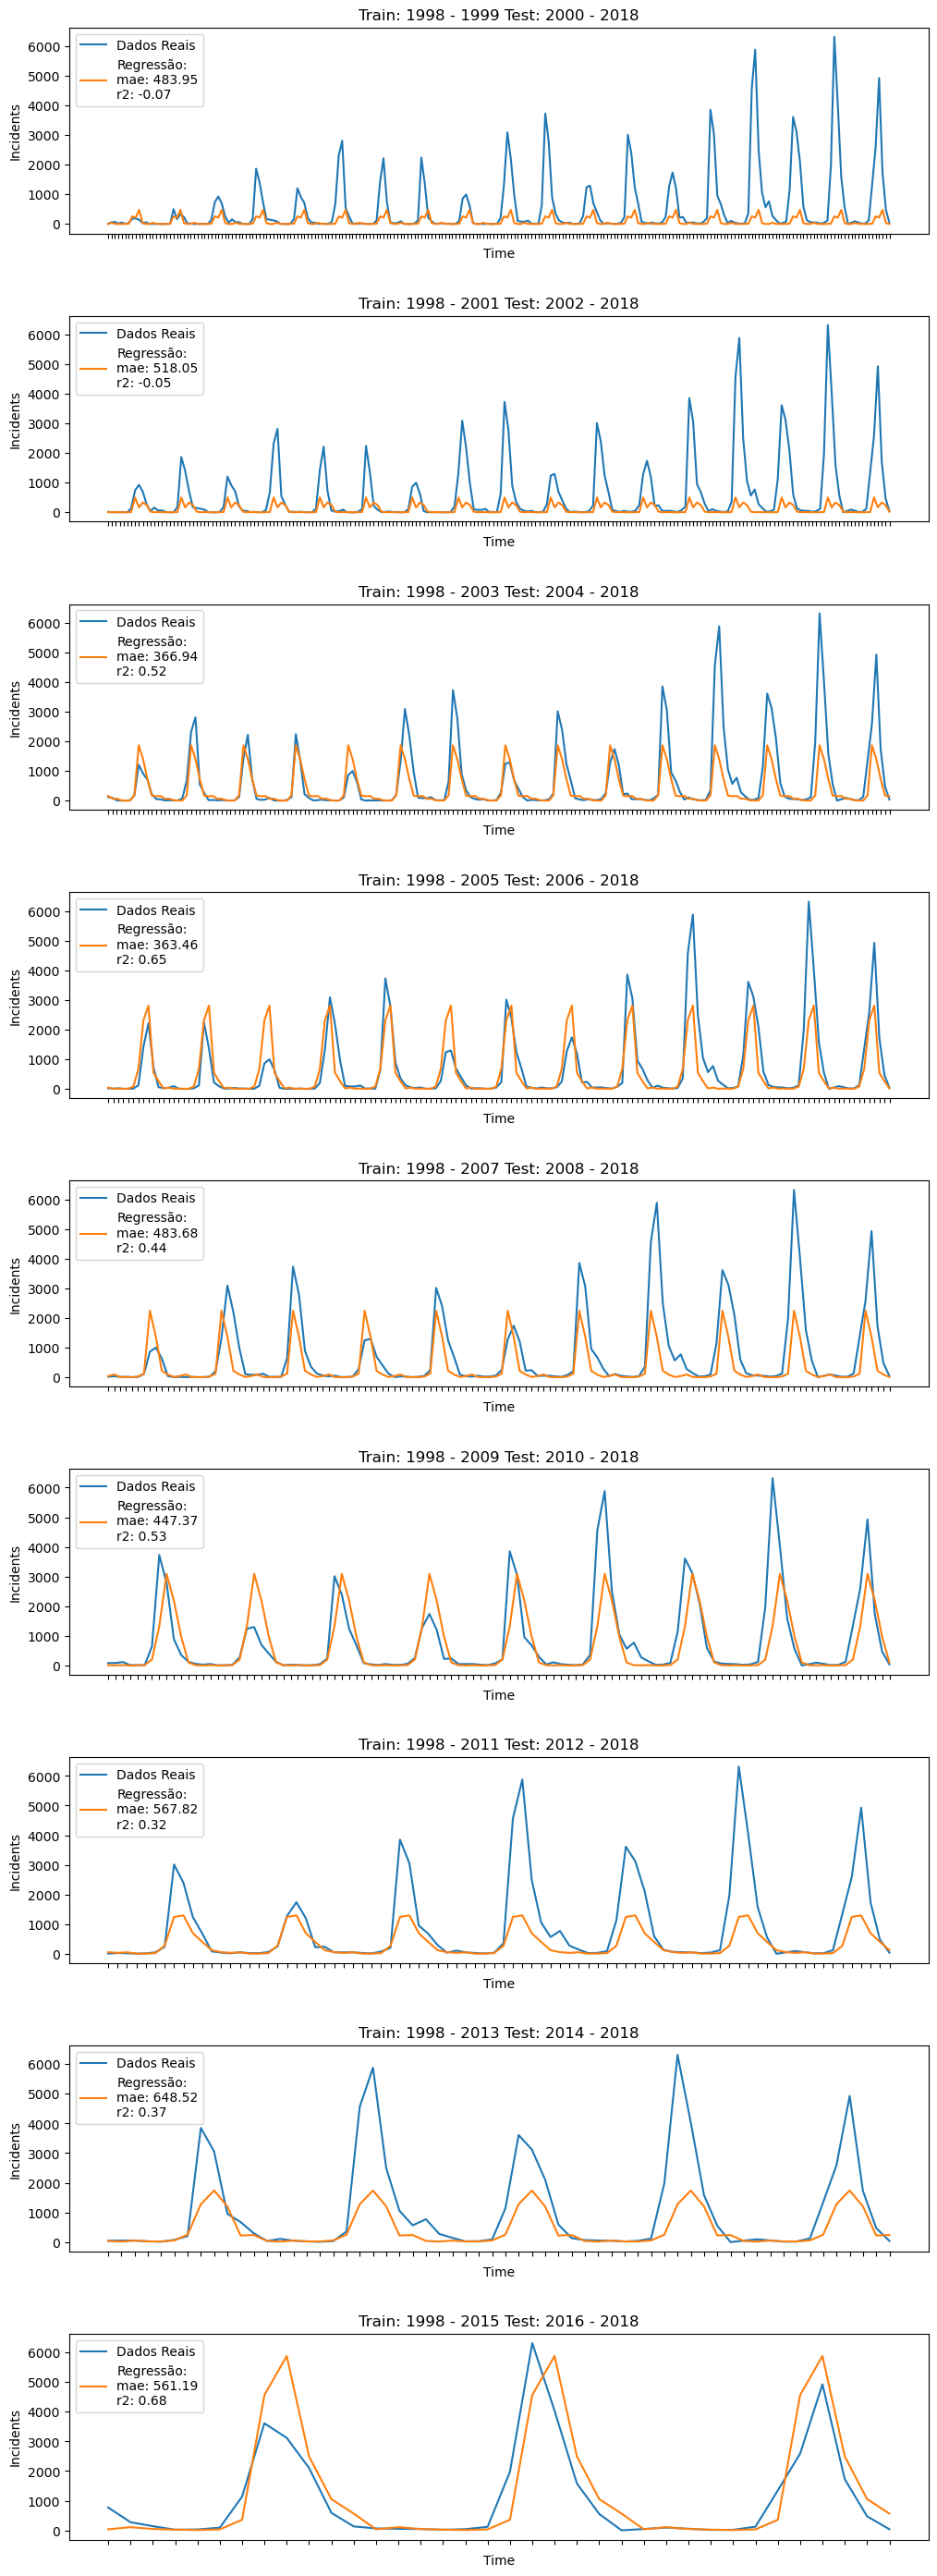

In [10]:
plt.rcParams['figure.figsize'] = [12, 4*9]
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['figure.subplot.hspace'] = 0.4 

fig, axs = plt.subplots(9)

i = 0
for cut_year in range(2000, 2017, 2):
    X_train, X_test = X.loc[X['year'] < cut_year], X[X['year'] >= cut_year]
    y_train, y_test = y.loc[X['year'] < cut_year], y[X['year'] >= cut_year]
    
    et = ExtraTreesRegressor()
    et.fit(X_train, y_train.values.ravel())
    
    y_predicted = et.predict(X_test)
    
    axs[i].plot(np.array(clean_x_axis(X_test)), y_test, label=f"Dados Reais")
    axs[i].plot(np.array(clean_x_axis(X_test)), y_predicted, label=f"Regressão:\nmae: {np.round(mean_absolute_error(y_test, y_predicted), 2)}\nr2: {np.round(r2_score(y_test, y_predicted),2)}")
    
    axs[i].axes.xaxis.set_ticklabels([])
    axs[i].legend()
    axs[i].set_title(f"Train: 1998 - {cut_year - 1} Test: {cut_year} - 2018")
    axs[i].set_ylabel("Incidents")
    
    axs[i].set_xlabel("Time")
    i += 1

### Gradient Boosting

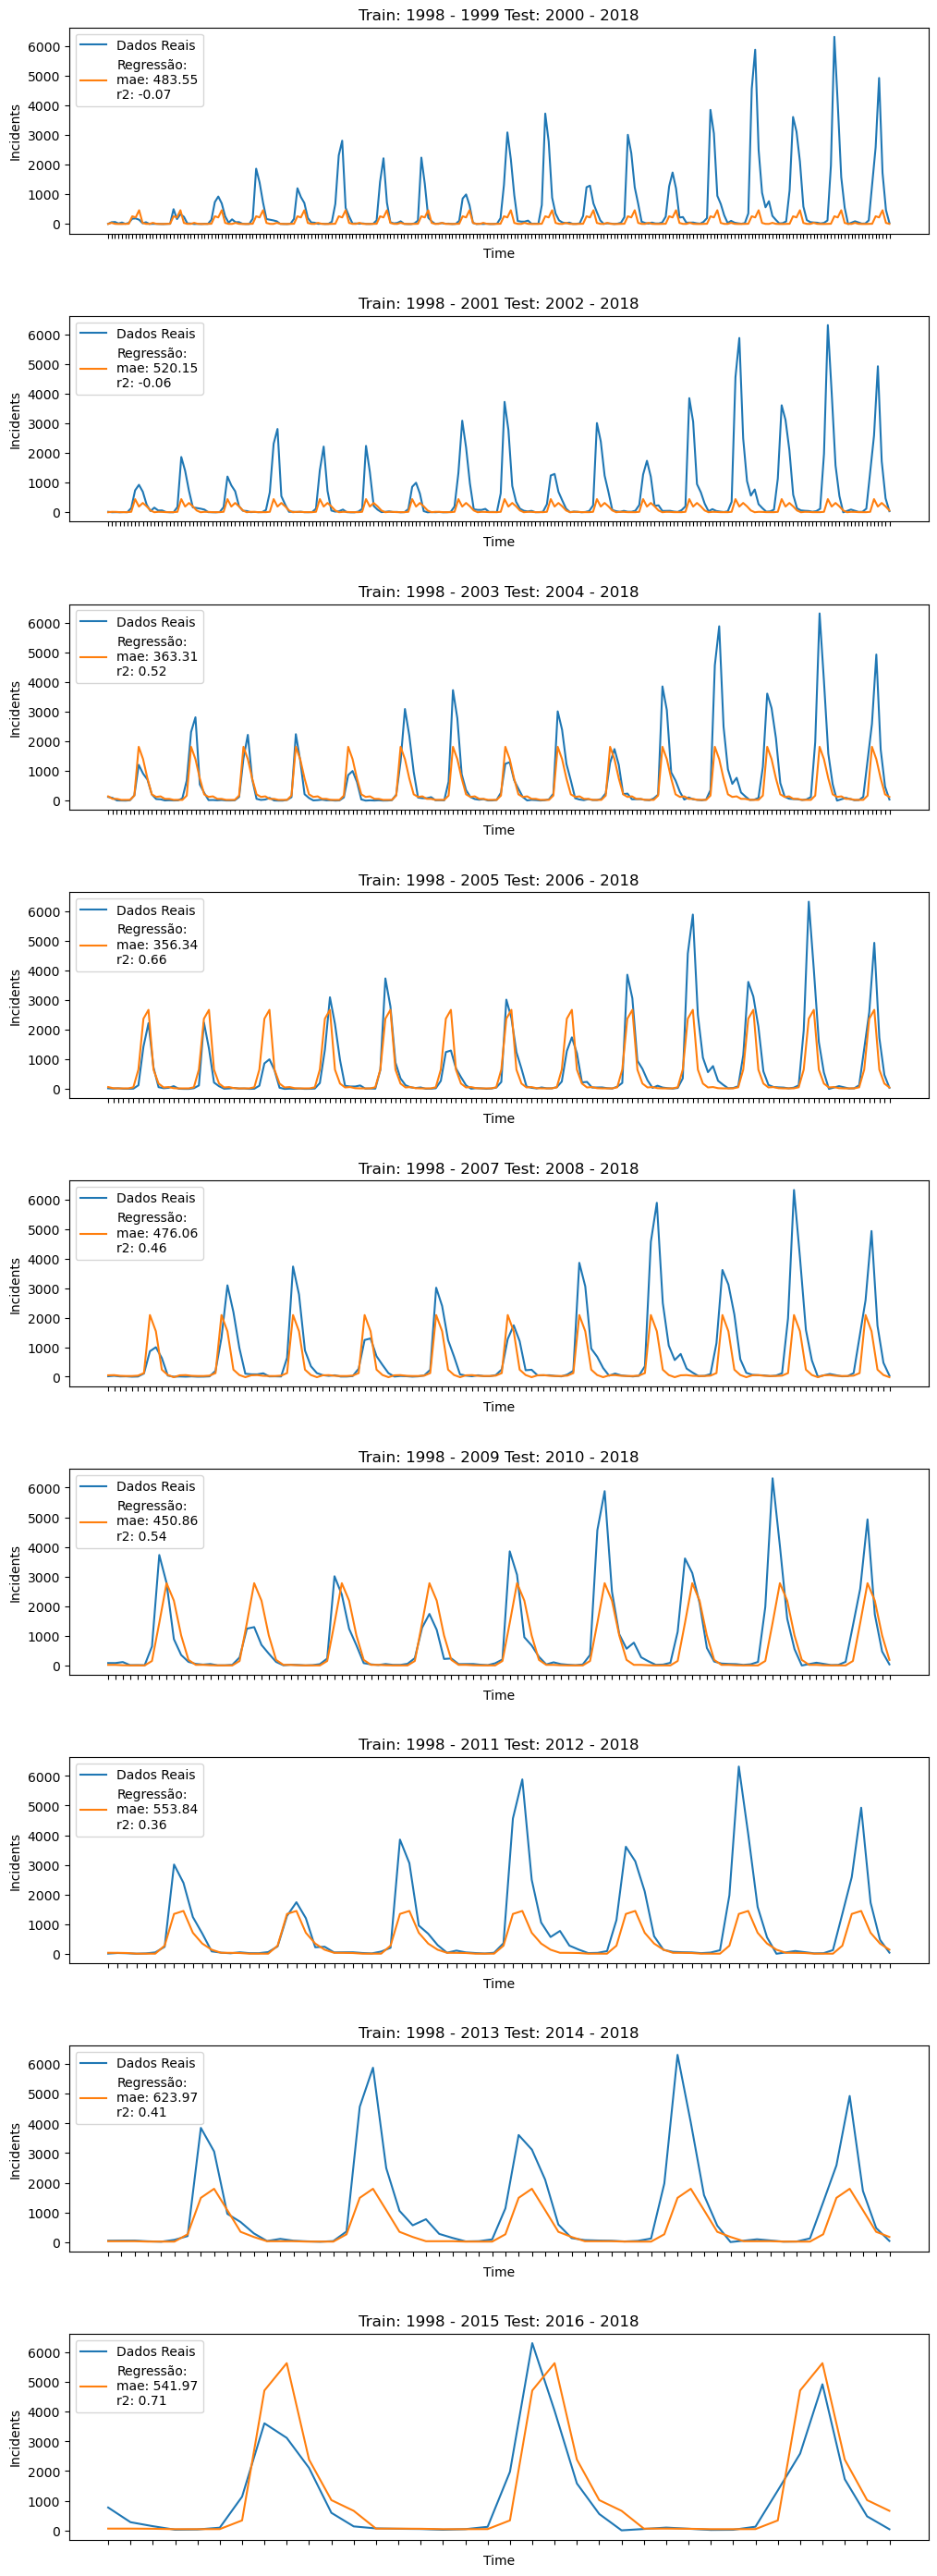

In [12]:
plt.rcParams['figure.figsize'] = [12, 4*9]
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['figure.subplot.hspace'] = 0.4 

fig, axs = plt.subplots(9)

i = 0
for cut_year in range(2000, 2017, 2):
    X_train, X_test = X.loc[X['year'] < cut_year], X[X['year'] >= cut_year]
    y_train, y_test = y.loc[X['year'] < cut_year], y[X['year'] >= cut_year]
    
    gb = GradientBoostingRegressor()
    gb.fit(X_train, y_train.values.ravel())
    
    y_predicted = gb.predict(X_test)
    
    axs[i].plot(np.array(clean_x_axis(X_test)), y_test, label=f"Dados Reais")
    axs[i].plot(np.array(clean_x_axis(X_test)), y_predicted, label=f"Regressão:\nmae: {np.round(mean_absolute_error(y_test, y_predicted), 2)}\nr2: {np.round(r2_score(y_test, y_predicted),2)}")
    
    axs[i].axes.xaxis.set_ticklabels([])
    axs[i].legend()
    axs[i].set_title(f"Train: 1998 - {cut_year - 1} Test: {cut_year} - 2018")
    axs[i].set_ylabel("Incidents")
    
    axs[i].set_xlabel("Time")
    i += 1